In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Converting Images to Grayscale

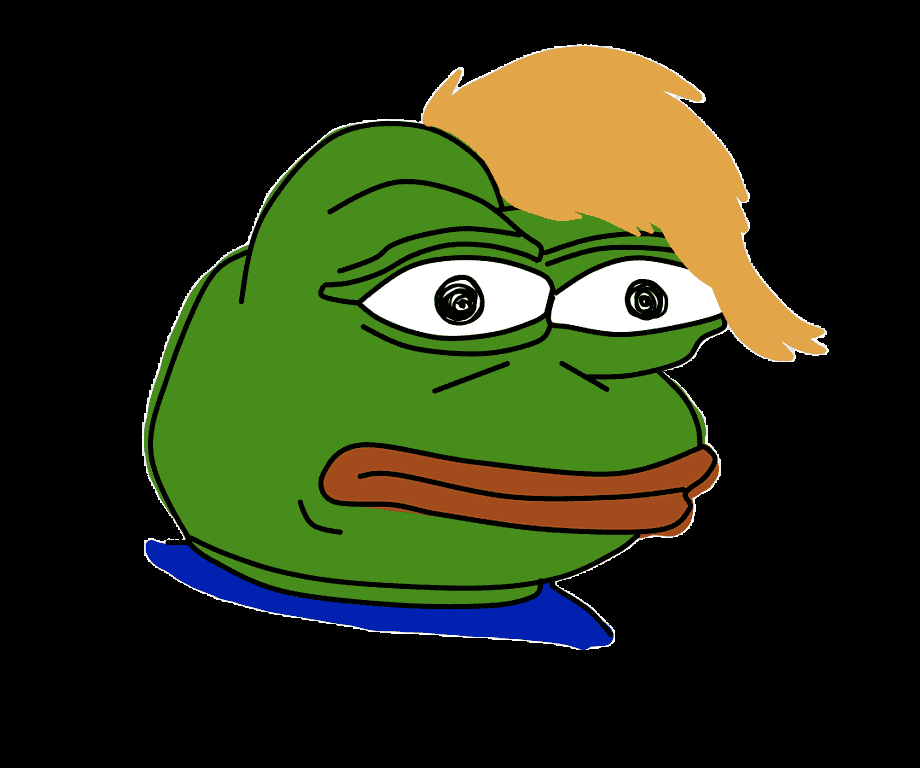

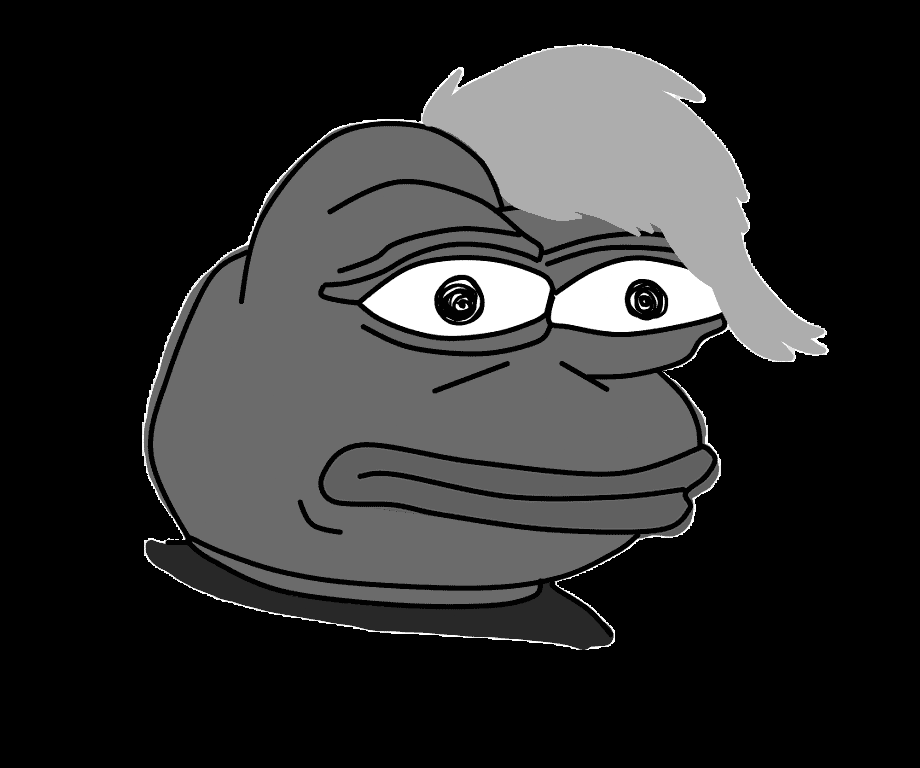

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

#Pepe the Frog image
image = cv2.imread("/content/drive/MyDrive/Elective 2 Finals/Part 1/pepe.png")
cv2_imshow(image)

#Grayscale image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

# 2.Visualizing Edge Detection

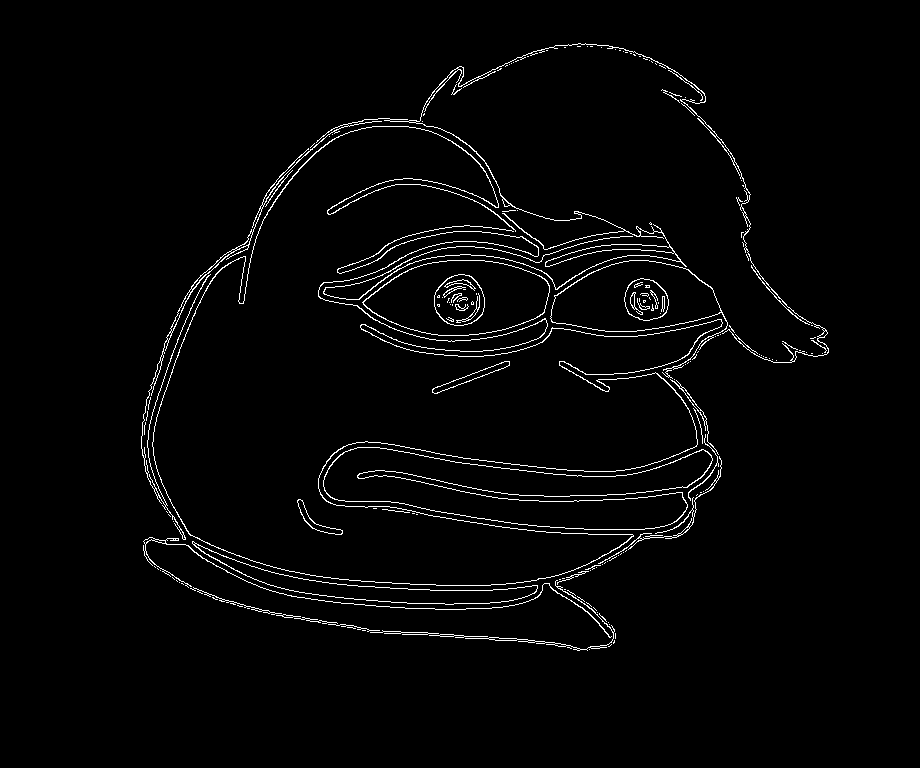

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

#colorful image
image = cv2.imread("/content/drive/MyDrive/Elective 2 Finals/Part 1/pepe.png")


canny_image = cv2.Canny(image, 150,200)
cv2_imshow(canny_image)


# 3.Demonstrating Morphological Erosion

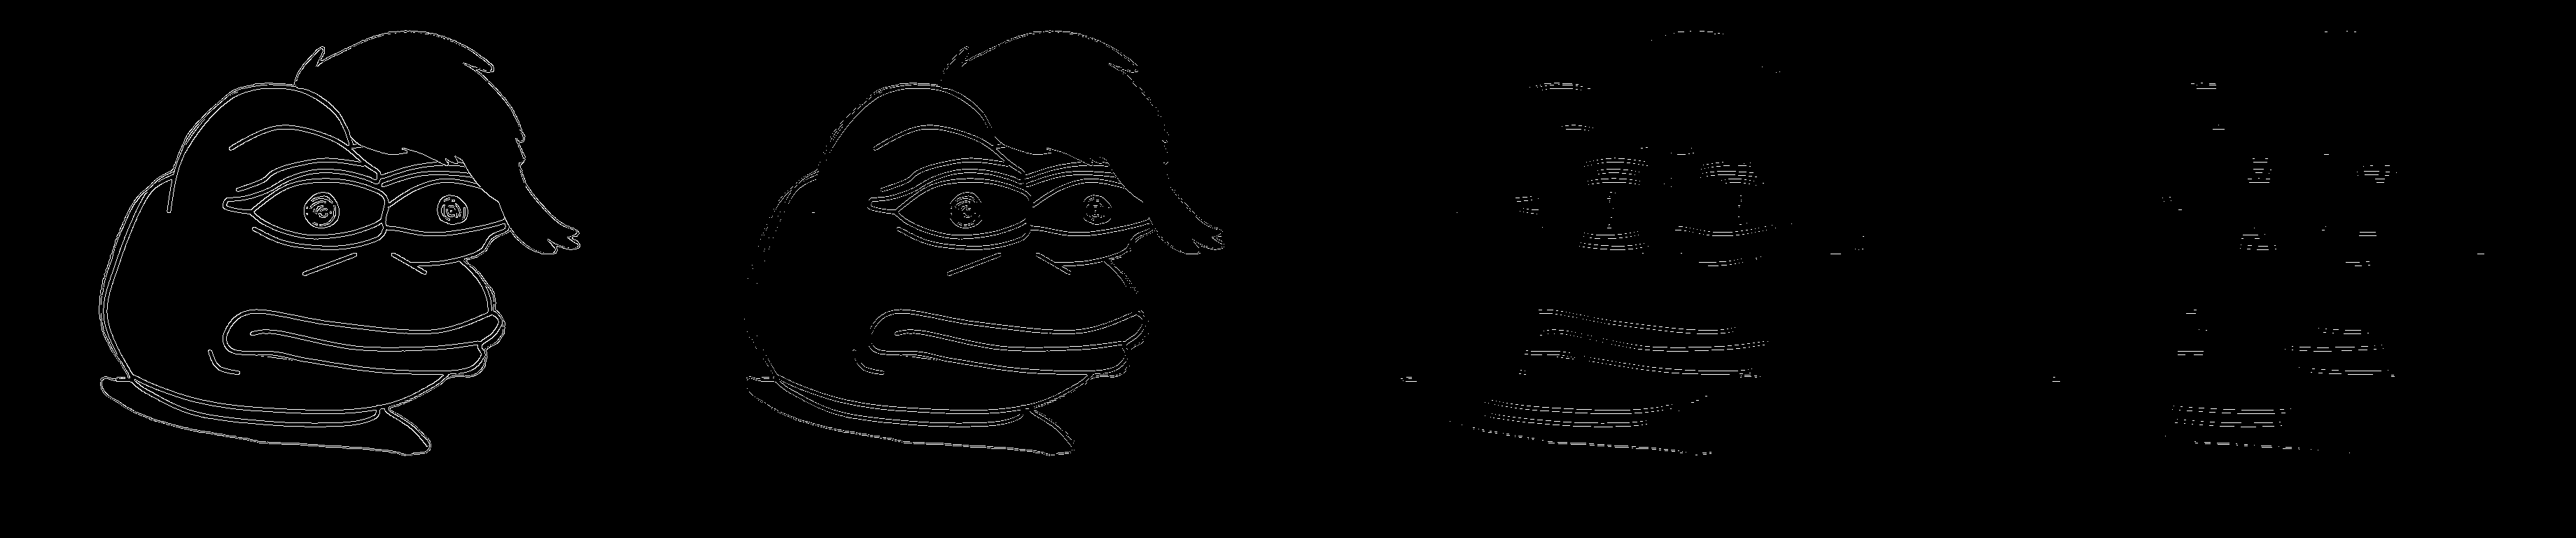

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

#Pepe the Frog image
image = cv2.imread("/content/drive/MyDrive/Elective 2 Finals/Part 1/pepe.png")

canny_image = cv2.Canny(image, 150,200)

# Erosion
kernel1 = np.ones((1,2), np.uint8)
kernel2 = np.ones((1,3), np.uint8)
kernel3 = np.ones((1,4), np.uint8)

erode_image1 = cv2.erode(canny_image,kernel1, iterations=1)
erode_image2 = cv2.erode(canny_image,kernel2, iterations=2)
erode_image3 = cv2.erode(canny_image,kernel3, iterations=3)

display = np.hstack([canny_image, erode_image1, erode_image2, erode_image3])
cv2_imshow(display)

# 4. Demonstrating Morphological Dilation

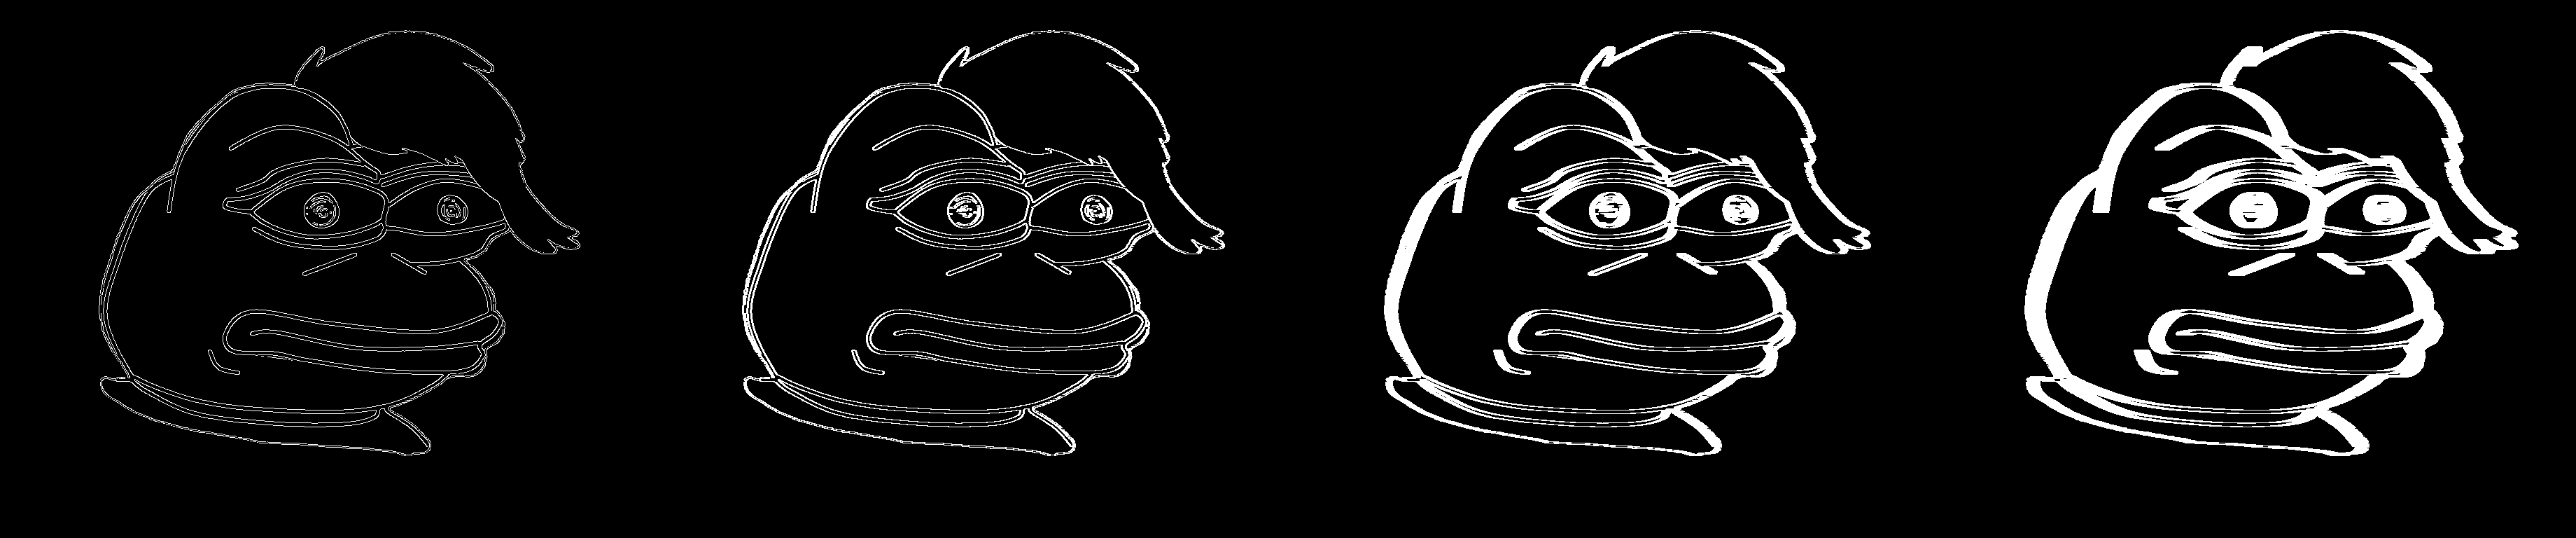

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

#Pepe the Frog image
image = cv2.imread("/content/drive/MyDrive/Elective 2 Finals/Part 1/pepe.png")

canny_image = cv2.Canny(image, 150,200)

# Erosion
kernel1 = np.ones((1,3), np.uint8)
kernel2 = np.ones((1,5), np.uint8)
kernel3 = np.ones((1,7), np.uint8)

dilate_image1 = cv2.dilate(canny_image,kernel1, iterations=1)
dilate_image2 = cv2.dilate(canny_image,kernel2, iterations=2)
dilate_image3 = cv2.dilate(canny_image,kernel3, iterations=3)

display = np.hstack([canny_image, dilate_image1, dilate_image2, dilate_image3])
cv2_imshow(display)

# 5.Reducing Noise in Photos

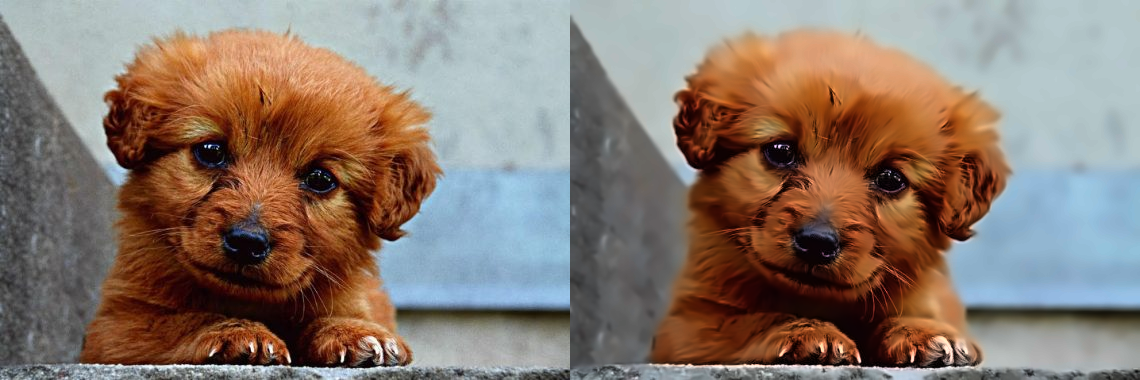

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

image = cv2.imread("/content/drive/MyDrive/Elective 2 Finals/Part 1/puppu.jpg")

dst = cv2.fastNlMeansDenoisingColored(image, None, 10, 20, 7, 15)
display = np.hstack((image, dst))
cv2_imshow(display)

# 6.Drawing Geometric Shapes on Images

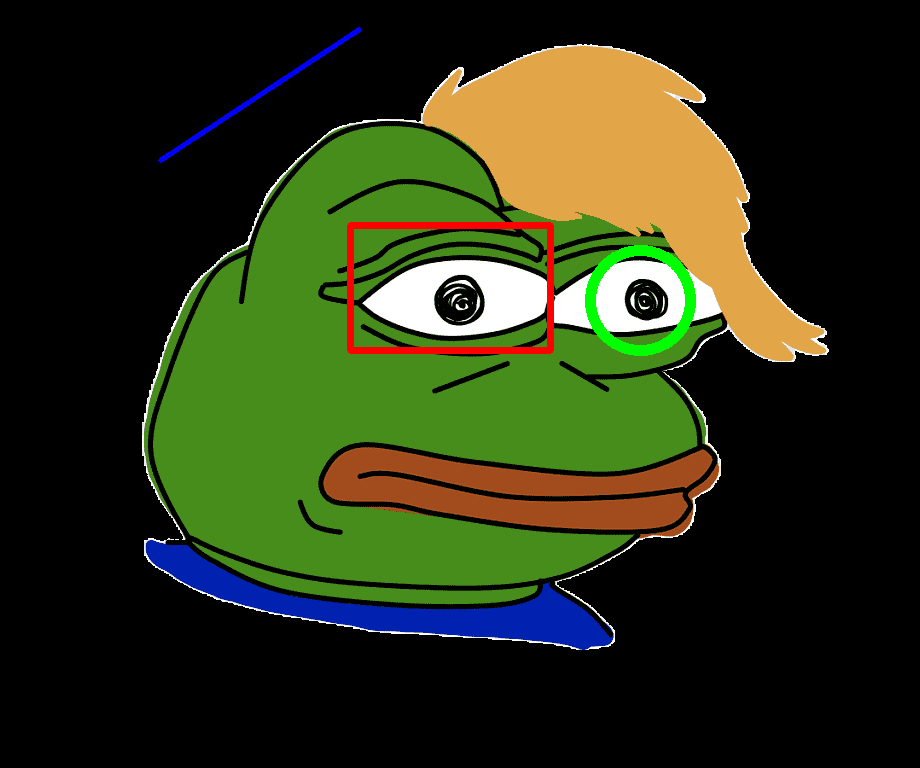

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

#Pepe the Frog image
image = cv2.imread("/content/drive/MyDrive/Elective 2 Finals/Part 1/pepe.png")

# Drawing Function
# Drawing a Circle
cv2.circle(image, (640,300), 50, (0,255,0), 10)
# Drawing a Rectangle
cv2.rectangle(image, (350,225), (550,350), (0,0,255), 5)
# Draw a Line
cv2.line(image, (160,160), (359,29), (255,0,0), 3)

cv2_imshow(image)

# 7.Adding Text to Images

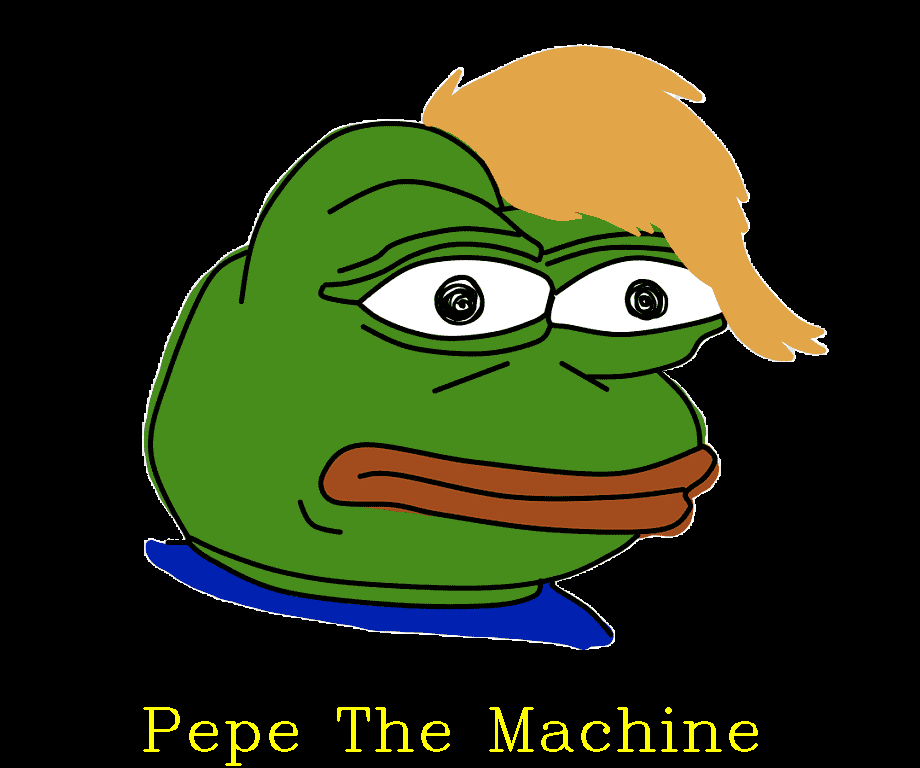

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

#Pepe the Frog image
image = cv2.imread("/content/drive/MyDrive/Elective 2 Finals/Part 1/pepe.png")

cv2.putText(image, "Pepe The Machine",(140,750),cv2.FONT_HERSHEY_COMPLEX, 2, (0,255,255), 2)
cv2_imshow(image)

# 8.Isolating Objects by Color

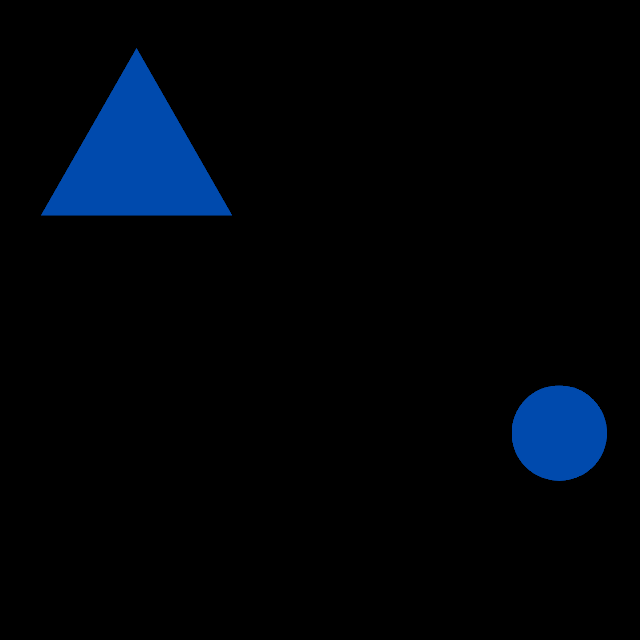

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

#image with shapes
image = cv2.imread("/content/drive/MyDrive/Elective 2 Finals/Part 1/shapes.png")


hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
#Blue
lower_hue = np.array([90, 50, 70])
upper_hue = np.array([128, 255, 255])
mask = cv2.inRange(hsv, lower_hue, upper_hue)

result = cv2.bitwise_and(image, image, mask = mask)
cv2_imshow(result)

# 9.Detecting Faces in Group Photos

The number of faces detected are 8


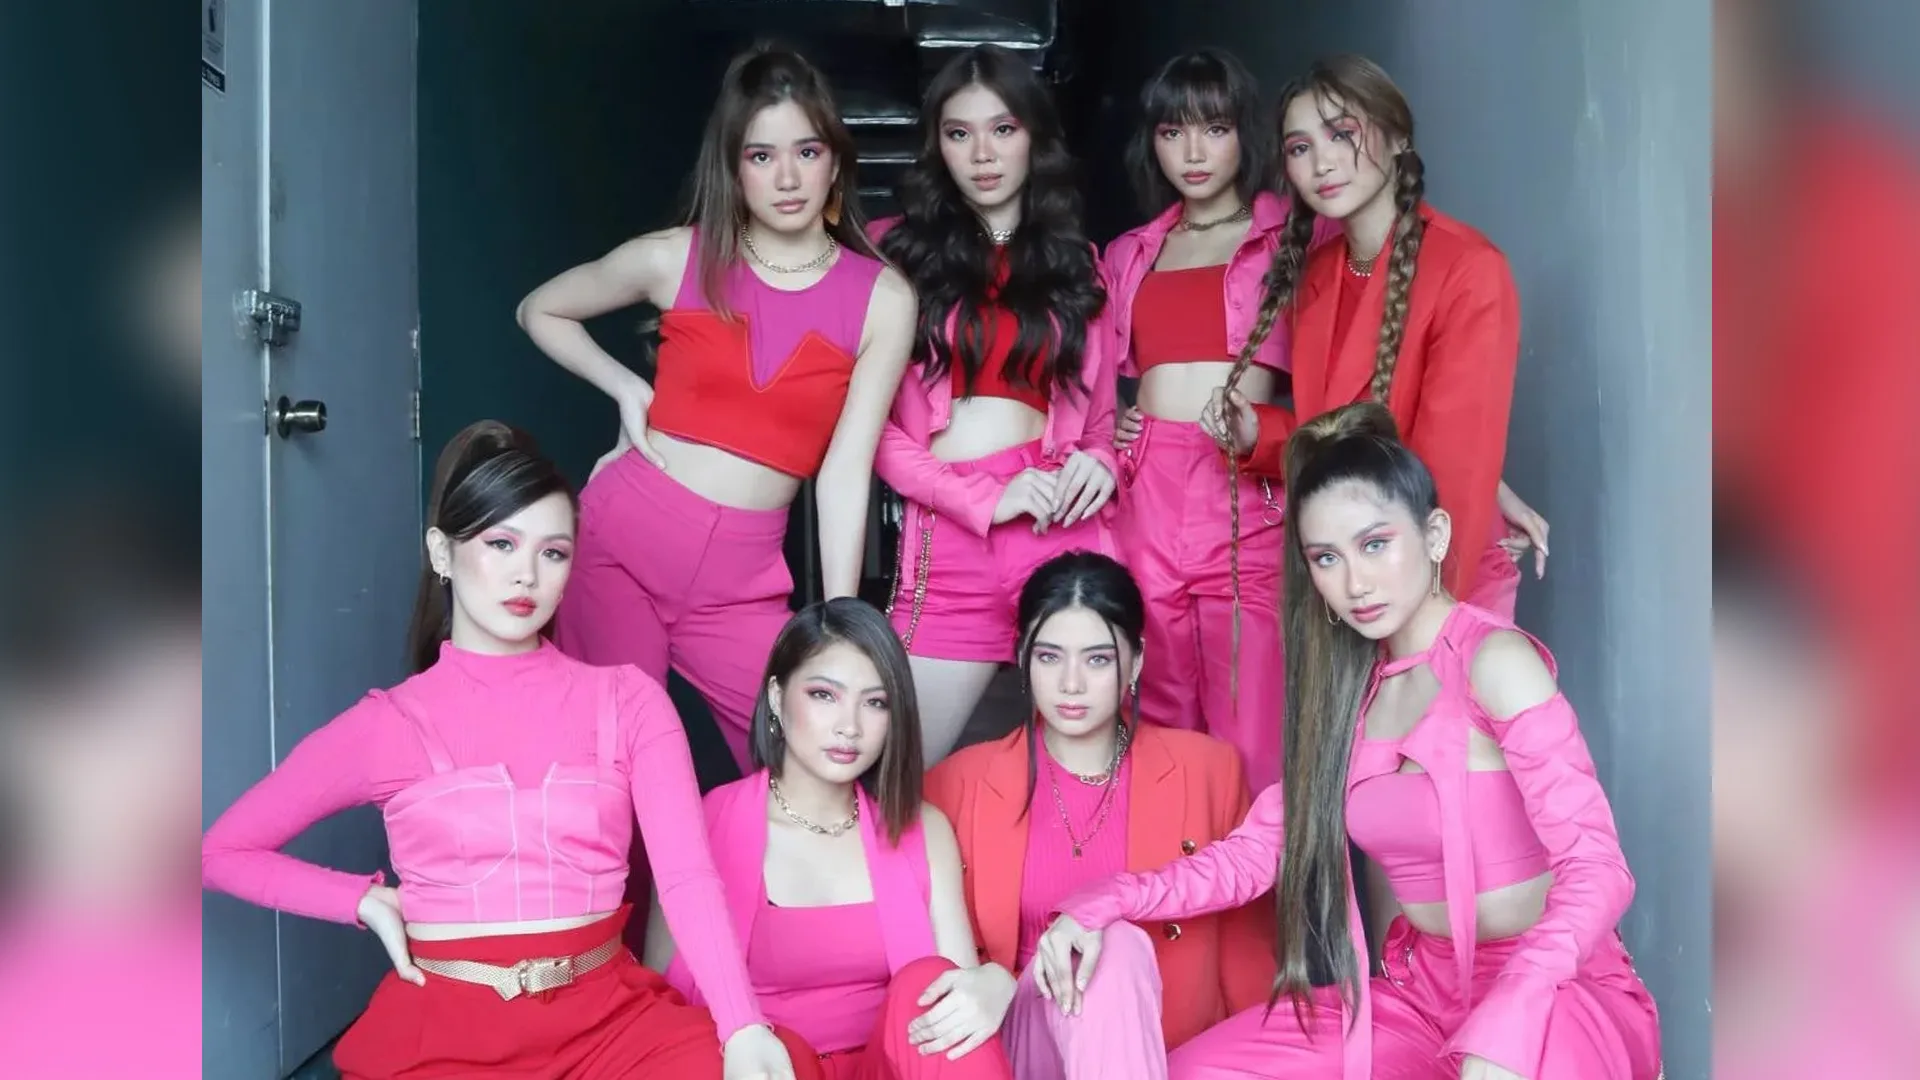

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Elective 2 Finals/Part 1/haarcascade_frontalface_default.xml')

img = cv2.imread("/content/drive/MyDrive/Elective 2 Finals/Part 1/bini.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
num_faces = len(faces)
print("The number of faces detected are", num_faces)
#for (x,y,w,h) in faces:
  #cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 3
cv2_imshow(img)

# 10.Outlining Shapes with Contours

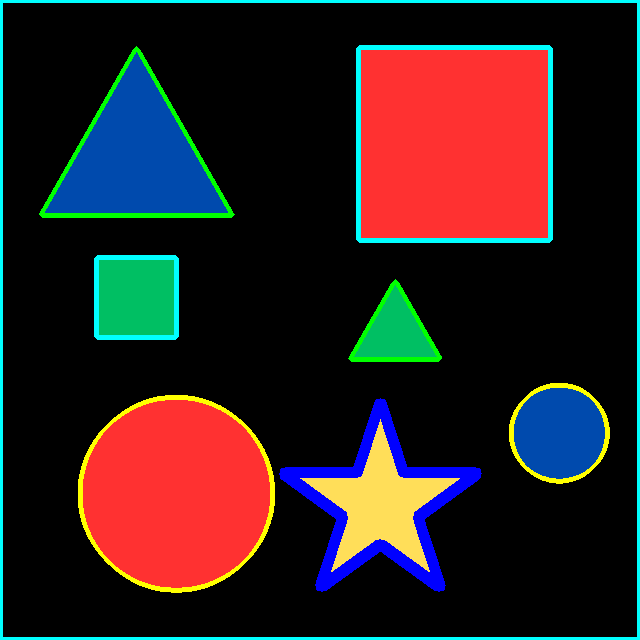

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread("/content/drive/MyDrive/Elective 2 Finals/Part 1/shapes.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray, 50, 255, 1)
contours, h = cv2.findContours(thresh, 1, 2)

for cnt in contours:
  approx = cv2.approxPolyDP(cnt, 0.01*cv2.arcLength(cnt, True),True)
  n = len(approx)
  if n==10:
    # this is a star
    cv2.drawContours(img,[cnt],0,255,10)
  elif n==3:
    # this is a triangle
    cv2.drawContours(img,[cnt],0,(0,255,0),3)
  elif n>9:
    # this is a circle
    cv2.drawContours(img,[cnt],0,(0,255,255),3)
  elif n==4:
    # this is a Square
    cv2.drawContours(img,[cnt],0,(255,255,0),3)
cv2_imshow(img)

# 11.Tracking a Ball in a Video

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

cap = cv2.VideoCapture("/content/drive/MyDrive/Elective 2 Finals/Part 1/ball.mp4")
# Get video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('/content/drive/MyDrive/Elective 2 Finals/Part 1/output_video.mp4', fourcc, fps, (frame_width, frame_height))
ball = []

while cap.isOpened():
  ret, frame = cap.read()
  if ret is False:
    break
  hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
  lower_hue = np.array([5, 50, 50])
  upper_hue = np.array([15, 255, 255])
  mask = cv2.inRange(hsv, lower_hue, upper_hue)

  (contours, _) = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

  center = None

  if len(contours) > 0:
    # Find the largest contour
    c = max(contours, key=cv2.contourArea)

    # Get the bounding rectangle
    x, y, w, h = cv2.boundingRect(c)

    # Draw the bounding box around the ball
    cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)  # Adjust thickness as needed

    # Calculate the center coordinates (optional for ball trajectory)
    M = cv2.moments(c)
    try:
      center = (int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"]))
      ball.append(center)  # Optional: store center coordinates for trajectory
    except:
      pass

  # Draw trajectory lines (optional, modify based on ball.append logic)
    if len(ball) > 2:
      for i in range(1, len(ball)):
        cv2.line(frame, ball[i-1], ball[i], (0, 0, 255), 5)

  out.write(frame)

print(ball)
out.release()

[(113, 113), (227, 226), (369, 304), (488, 436), (494, 103), (359, 119), (123, 523), (299, 525), (319, 319)]


# 12.Highlighting Detected Faces

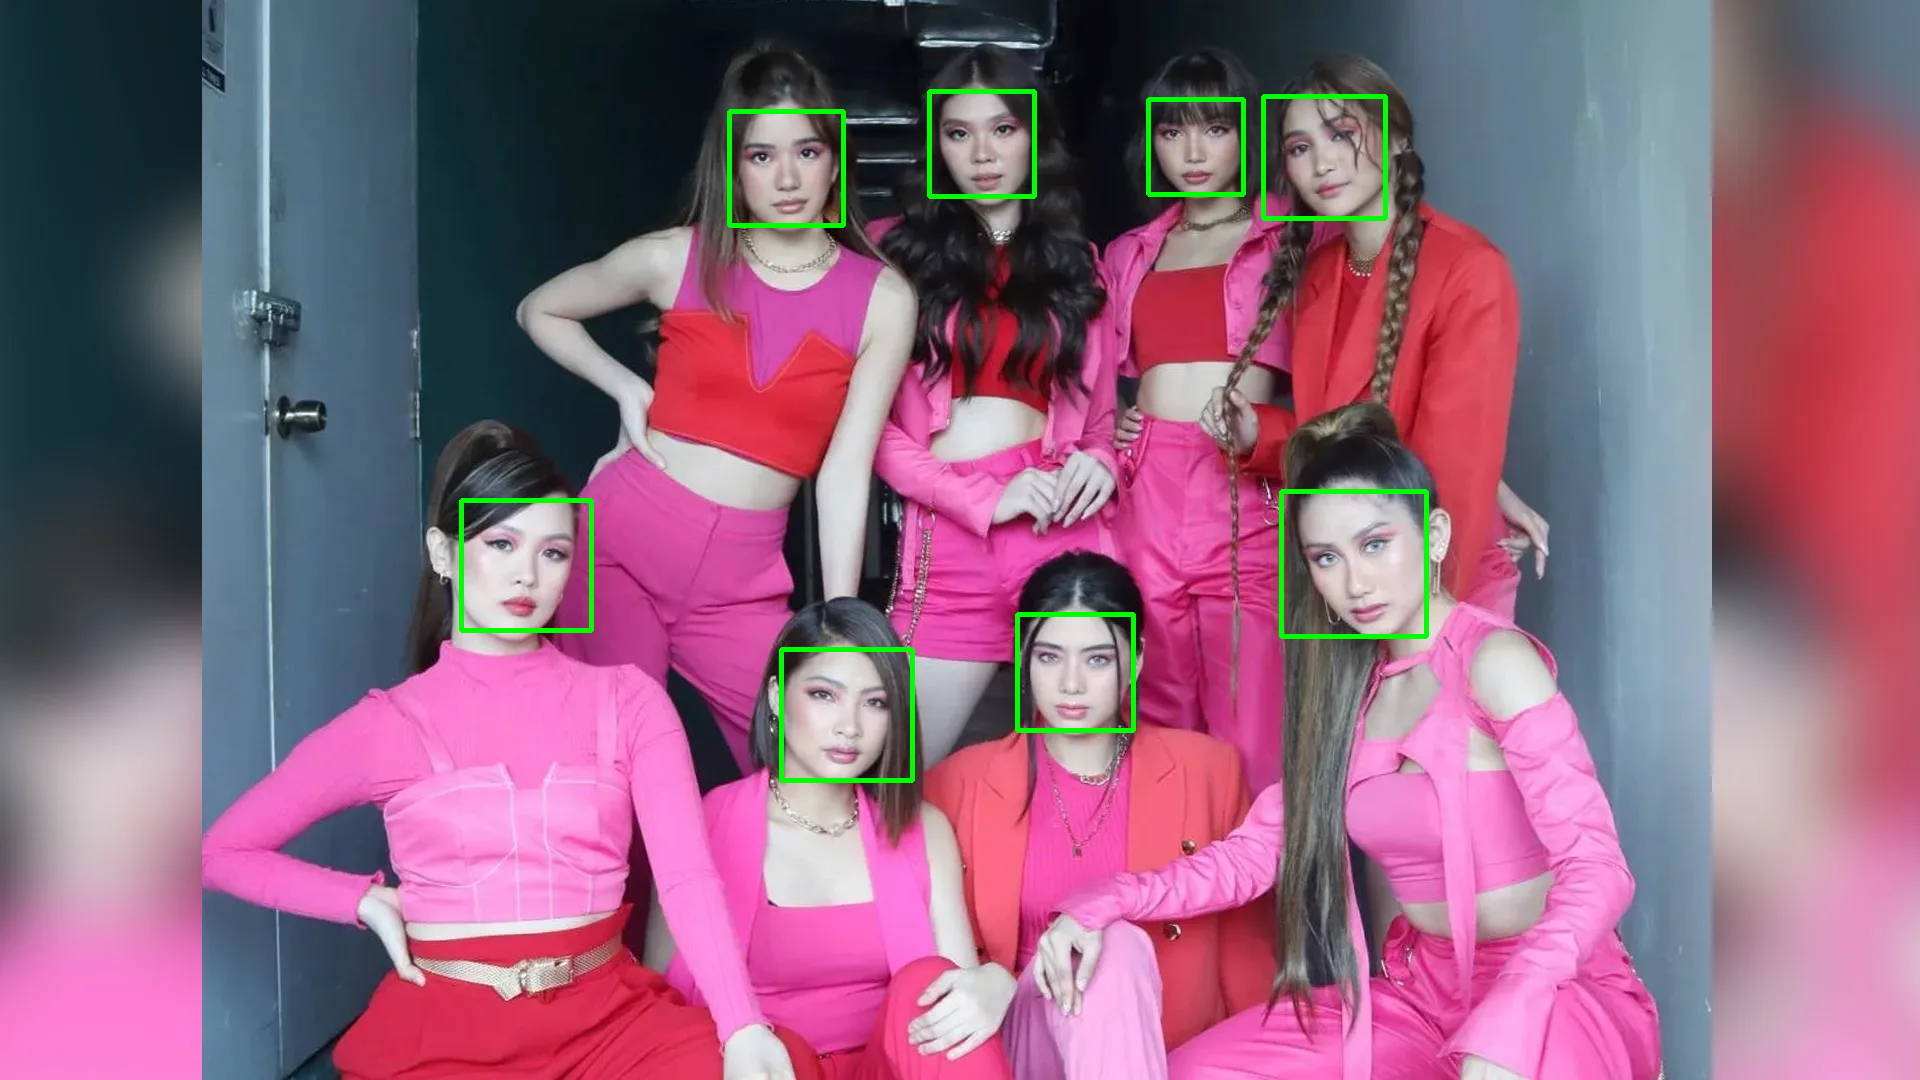

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Elective 2 Finals/Part 1/haarcascade_frontalface_default.xml')

img = cv2.imread("/content/drive/MyDrive/Elective 2 Finals/Part 1/bini.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
  cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 3)
cv2_imshow(img)

# 13.Extracting Contours for Shape Analysis

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def extract_shapes(image_path):
  """
  Extracts shapes (triangle, square, circle, star) from an image.

  Args:
    image_path: Path to the image file.

  Returns:
    A list of dictionaries, where each dictionary represents a shape and contains:
      - 'shape': The name of the shape ('triangle', 'square', 'circle', 'star').
      - 'contour': The contour of the shape.
  """

  img = cv2.imread(image_path)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  ret, thresh = cv2.threshold(gray, 50, 255, 1)
  contours, h = cv2.findContours(thresh, 1, 2)

  shapes = []
  for cnt in contours:
    approx = cv2.approxPolyDP(cnt, 0.01 * cv2.arcLength(cnt, True), True)
    n = len(approx)
    if n == 10:
      shapes.append({'shape': 'star', 'contour': cnt})
    elif n == 3:
      shapes.append({'shape': 'triangle', 'contour': cnt})
    elif n > 9:
      shapes.append({'shape': 'circle', 'contour': cnt})
    elif n == 4:
      shapes.append({'shape': 'square', 'contour': cnt})

  return shapes

# Example usage:
image_path = "/content/drive/MyDrive/Elective 2 Finals/Part 1/shapes.png"
extracted_shapes = extract_shapes(image_path)

# Print the extracted shapes
for shape in extracted_shapes:
  print(shape['shape'])

# Optionally, you can visualize the extracted shapes by drawing contours:
# img = cv2.imread(image_path)
# for shape in extracted_shapes:
#   cv2.drawContours(img, [shape['contour']], 0, (0, 255, 0), 3)
# cv2_imshow(img)

star
circle
circle
triangle
square
triangle
square
square


# Applying Image Blurring Techniques

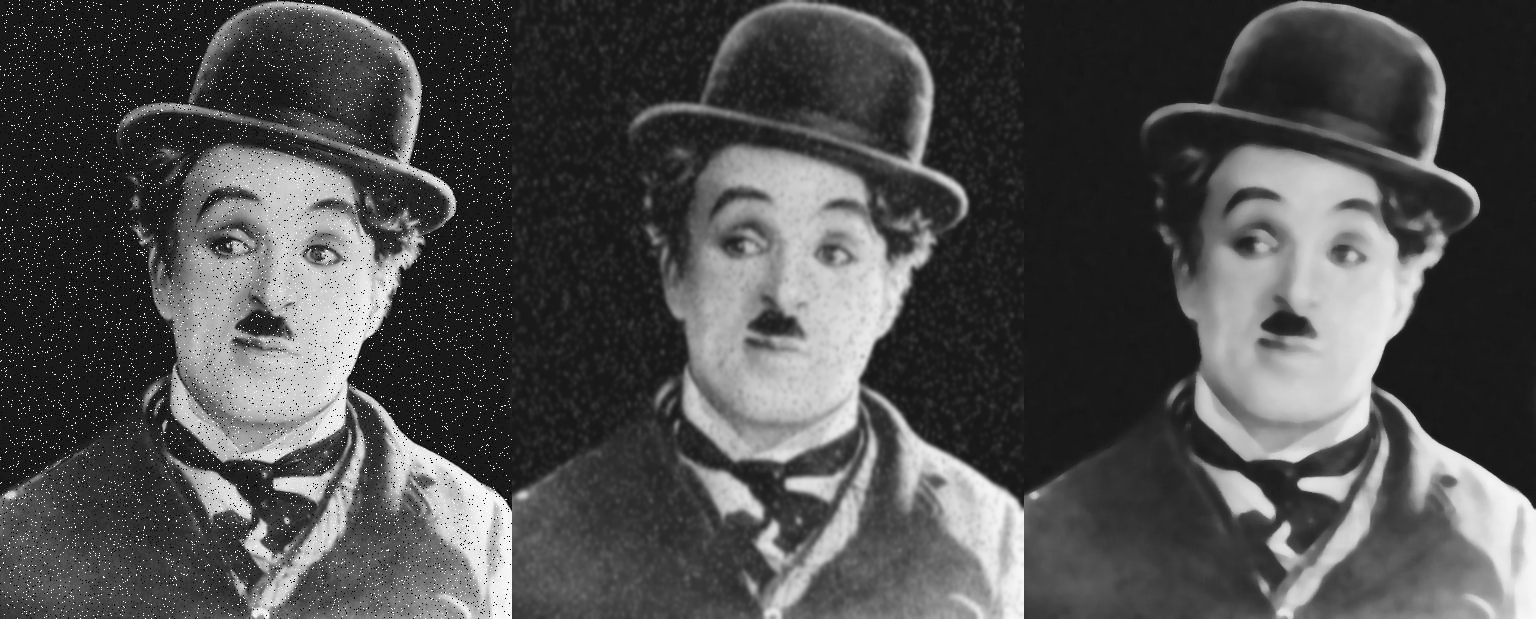

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Load the image
image_path = "/content/drive/MyDrive/Elective 2 Finals/Part 1/noisy.png"
img = cv2.imread(image_path)

# Define kernel size
kernel_size1 = 9  # You can adjust this value
kernel_size2 = 11

# Apply Gaussian Blur
gaussian_blurred = cv2.GaussianBlur(img, (kernel_size1, kernel_size2), 0)

# Apply Median Blur
median_blurred = cv2.medianBlur(img, kernel_size1)

# Display the results
display = np.hstack([img, gaussian_blurred, median_blurred])
cv2_imshow(display)

